In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
sns.set(color_codes = True) 
from scipy import stats 
from IPython.display import HTML
from sklearn.tree import DecisionTreeRegressor
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

#### GitHub Link [https://github.com/LukaVukosi05/Investment-strategy-Japan.git]

In [2]:
iShare_Japan = pd.read_csv("1329 ETF Stock Price History (2).csv") 

In [3]:
print(iShare_Japan.isnull().sum())

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [4]:
iShare_Japan.head(530)

,Date,Price,Open,High,Low,Vol.,Change %
0,04/28/2024,"39,830.0","39,960.0","40,220.0","39,530.0",94.27K,0.76%
1,04/21/2024,"39,530.0","38,290.0","40,040.0","38,280.0",232.40K,2.30%
2,04/14/2024,"38,640.0","40,650.0","40,850.0","38,260.0",298.87K,-6.17%
3,04/07/2024,"41,180.0","41,020.0","41,440.0","40,680.0",110.79K,1.38%
4,03/31/2024,"40,620.0","42,380.0","42,420.0","40,390.0",263.78K,-3.61%
...,...,...,...,...,...,...,...
524,04/06/2014,"14,390.0","15,300.0","15,330.0","14,280.0",68.11K,-7.04%
525,03/30/2014,"15,480.0","15,220.0","15,630.0","15,120.0",39.37K,2.58%
526,03/23/2014,"15,090.0","14,600.0","15,110.0","14,570.0",106.12K,3.71%
527,03/16/2014,"14,550.0","14,590.0","14,940.0","14,530.0",7.50K,-0.61%


# Converting the columns data to numerical values and removing the non-numeric characters and converting them to float. 

In [5]:
data_iSharesNikkei = pd.read_csv("1329 ETF Stock Price History (2).csv")

numerical_cols = ['Price', 'Open', 'High', 'Low']

for col in numerical_cols:
    data_iSharesNikkei[col] = data_iSharesNikkei[col].str.replace(',', '').str.replace('$', '').astype(float)
print(data_iSharesNikkei.dtypes)


Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object


In [6]:
data_iSharesNikkei = pd.read_csv("1329 ETF Stock Price History (2).csv")

def convert_to_numeric(value):
    if isinstance(value, str):
        return float(value.replace(',', ''))
    return value

columns_to_convert = ['Price', 'Open', 'High', 'Low']
for col in columns_to_convert:
    data_iSharesNikkei[col] = data_iSharesNikkei[col].apply(convert_to_numeric)

# Descriptive statistical Calculations

## The mean of the 'Price' column

In [7]:
price_mean = data_iSharesNikkei['Price'].mean()
print("Mean Price:", price_mean)

Mean Price: 23941.058601134217


## The median of the 'Price': 

In [8]:
price_median = data_iSharesNikkei['Price'].median()
print("Median Price:", price_median)

Median Price: 22860.0


## The mode: 

In [9]:
mode = data_iSharesNikkei.mode().iloc[0]
print("Mode of every column:",mode)

Mode of every column: Date        01/01/2017
Price          30050.0
Open           30150.0
High           23680.0
Low            19620.0
Vol.            32.14K
Change %         0.00%
Name: 0, dtype: object


## The weighted mean: 

In [10]:
weighted_mean = np.average(data_iSharesNikkei[columns_to_convert], axis=0)
print("Weighted mean of every column:", weighted_mean)


Weighted mean of every column: [23941.05860113 23907.89224953 24290.72778828 23526.47448015]


## The geometric mean: 

In [11]:
geometric_mean = stats.gmean(data_iSharesNikkei.replace(0, 1)[columns_to_convert], axis=0)
print("Geometric mean of every column:")
print(geometric_mean)

Geometric mean of every column:
[23262.74225011 23230.31025866 23609.28614204 22855.2129588 ]


## The percentiles (25th, 50th, and 75th): 

In [12]:
percentiles = data_iSharesNikkei[columns_to_convert].quantile([0.25, 0.5, 0.75])
print("Percentiles (25th, 50th, and 75th) of every column:",percentiles )

Percentiles (25th, 50th, and 75th) of every column:         Price     Open     High      Low
0.25  19810.0  19800.0  20020.0  19450.0
0.50  22860.0  22830.0  23210.0  22470.0
0.75  28490.0  28470.0  28865.0  28080.0


## The range: 

In [13]:
ranges = data_iSharesNikkei[columns_to_convert].max() - data_iSharesNikkei[columns_to_convert].min()
print("Range of every column:", ranges)

Range of every column: Price    27930.0
Open     28080.0
High     27810.0
Low      27420.0
dtype: float64


## The interquartile range (IQR): 

In [14]:
iqr = data_iSharesNikkei[columns_to_convert].quantile(0.75) - data_iSharesNikkei[columns_to_convert].quantile(0.25)
print("Interquartile range (IQR) of every column:",iqr)

Interquartile range (IQR) of every column: Price    8680.0
Open     8670.0
High     8845.0
Low      8630.0
dtype: float64


## The variance: 

In [15]:
variances = data_iSharesNikkei[columns_to_convert].var()
print("Variance of every column:", variances)

Variance of every column: Price    3.431310e+07
Open     3.424073e+07
High     3.509018e+07
Low      3.327828e+07
dtype: float64


## The skewness:

In [16]:
skewness = data_iSharesNikkei[columns_to_convert].skew()
print("Skewness of every column:",skewness)

Skewness of every column: Price    0.683773
Open     0.684033
High     0.702481
Low      0.664306
dtype: float64


## Chebyshev's theorem: 

In [17]:
chebyshev_outliers = []
for col in columns_to_convert:
    mean = data_iSharesNikkei[col].mean()
    std = data_iSharesNikkei[col].std()
    lower_bound = mean - 2 * std
    upper_bound = mean + 2 * std
    outliers = data_iSharesNikkei[(data_iSharesNikkei[col] < lower_bound) | (data_iSharesNikkei[col] > upper_bound)][col]
    chebyshev_outliers.append(outliers)

print("\nChebyshev's theorem outliers for every column:")
for i, col in enumerate(columns_to_convert):
    print(f"{col}: {chebyshev_outliers[i].tolist()}")



Chebyshev's theorem outliers for every column:
Price: [39830.0, 39530.0, 38640.0, 41180.0, 40620.0, 42140.0, 42320.0, 40070.0, 41080.0, 41330.0, 40480.0, 39820.0, 38190.0, 37700.0, 37230.0, 37490.0, 37090.0]
Open: [39960.0, 38290.0, 40650.0, 41020.0, 42380.0, 42200.0, 40320.0, 40380.0, 41720.0, 40720.0, 39790.0, 38840.0, 38020.0, 37350.0, 37940.0, 37150.0]
High: [40220.0, 40040.0, 40850.0, 41440.0, 42420.0, 42400.0, 42540.0, 40550.0, 41890.0, 41390.0, 40520.0, 40200.0, 38550.0, 37980.0, 38560.0, 37780.0, 37230.0]
Low: [39530.0, 38280.0, 38260.0, 40680.0, 40390.0, 41700.0, 40300.0, 39620.0, 40900.0, 40240.0, 39400.0, 38760.0, 37380.0, 37190.0, 37200.0, 36860.0]


## The Empirical rule:

In [18]:
empirical_rule_outliers = []
for col in columns_to_convert:
    mean = data_iSharesNikkei[col].mean()
    std = data_iSharesNikkei[col].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    outliers = data_iSharesNikkei[(data_iSharesNikkei[col] < lower_bound) | (data_iSharesNikkei[col] > upper_bound)][col]
    empirical_rule_outliers.append(outliers)

print("\nEmpirical rule outliers for every column:")
for i, col in enumerate(columns_to_convert):
    print(f"{col}: {empirical_rule_outliers[i].tolist()}")



Empirical rule outliers for every column:
Price: [42140.0, 42320.0]
Open: [42380.0, 42200.0, 41720.0]
High: [42420.0, 42400.0, 42540.0]
Low: [41700.0, 40900.0]


## 5-number summary: 

In [19]:
five_num_summary = data_iSharesNikkei[columns_to_convert].describe().loc[['min', '25%', '50%', '75%', 'max']]
print("Five-number summary of every column:", five_num_summary)

Five-number summary of every column:        Price     Open     High      Low
min  14390.0  14300.0  14730.0  14280.0
25%  19810.0  19800.0  20020.0  19450.0
50%  22860.0  22830.0  23210.0  22470.0
75%  28490.0  28470.0  28865.0  28080.0
max  42320.0  42380.0  42540.0  41700.0


## Calculate covariance matrix

In [20]:
covariance_matrix = data_iSharesNikkei[columns_to_convert].cov()
print("Covariance matrix:", covariance_matrix)

Covariance matrix:               Price          Open          High           Low
Price  3.431310e+07  3.411206e+07  3.462751e+07  3.372985e+07
Open   3.411206e+07  3.424073e+07  3.459823e+07  3.367294e+07
High   3.462751e+07  3.459823e+07  3.509018e+07  3.408635e+07
Low    3.372985e+07  3.367294e+07  3.408635e+07  3.327828e+07


## Correlation coefficient matrix:

In [21]:
correlation_matrix = data_iSharesNikkei[columns_to_convert].corr()
print("Correlation coefficient matrix:", correlation_matrix)

Correlation coefficient matrix:           Price      Open      High       Low
Price  1.000000  0.995191  0.997927  0.998169
Open   0.995191  1.000000  0.998136  0.997537
High   0.997927  0.998136  1.000000  0.997487
Low    0.998169  0.997537  0.997487  1.000000


## Frequency of each value:

In [22]:
frequencies = {}
for col in data_iSharesNikkei.columns:
    frequencies[col] = data_iSharesNikkei[col].value_counts()
print("\nFrequency of each value in every column:")
for col, freq in frequencies.items():
    print(f"{col}:\n{freq}")


Frequency of each value in every column:
Date:
Date
04/28/2024    1
08/20/2017    1
05/14/2017    1
05/21/2017    1
05/28/2017    1
             ..
01/17/2021    1
01/24/2021    1
01/31/2021    1
02/07/2021    1
03/09/2014    1
Name: count, Length: 529, dtype: int64
Price:
Price
30050.0    5
22860.0    3
28450.0    3
18260.0    3
21120.0    3
          ..
28600.0    1
29800.0    1
30900.0    1
29900.0    1
14640.0    1
Name: count, Length: 448, dtype: int64
Open:
Open
30250.0    4
30150.0    4
18860.0    3
19640.0    3
23230.0    3
          ..
27600.0    1
27750.0    1
27620.0    1
29150.0    1
15500.0    1
Name: count, Length: 459, dtype: int64
High:
High
30900.0    4
23680.0    4
30300.0    3
19950.0    3
20130.0    3
          ..
27780.0    1
27820.0    1
28590.0    1
29880.0    1
15570.0    1
Name: count, Length: 437, dtype: int64
Low:
Low
19620.0    4
22770.0    4
22830.0    3
28600.0    3
17030.0    3
          ..
29250.0    1
29620.0    1
29850.0    1
29930.0    1
14600.0    1

## Cross-tabulation of two columns: Price and Vol.:

In [23]:
cross_tab = pd.crosstab(data_iSharesNikkei['Price'], data_iSharesNikkei['Vol.'])
print("Cross-tabulation of 'Price' and 'Vol.' columns:", cross_tab)

Cross-tabulation of 'Price' and 'Vol.' columns: Vol.     10.41K  10.73K  10.80K  100.28K  100.40K  101.13K  101.15K  101.57K  \
Price                                                                          
14390.0       0       0       0        0        0        0        0        0   
14490.0       0       0       0        0        0        0        0        0   
14550.0       0       0       0        0        0        0        0        0   
14600.0       0       0       0        0        0        0        0        0   
14640.0       0       0       0        0        0        0        0        0   
...         ...     ...     ...      ...      ...      ...      ...      ...   
41080.0       0       0       0        0        0        0        0        0   
41180.0       0       0       0        0        0        0        0        0   
41330.0       0       0       0        0        0        0        0        0   
42140.0       0       0       0        0        0        0        0     

## Linear regression: 

In [24]:
X = data_iSharesNikkei[['Open', 'High', 'Low']]
y = data_iSharesNikkei['Price']
lin_reg = LinearRegression().fit(X, y)
lin_reg_coef = lin_reg.coef_
lin_reg_intercept = lin_reg.intercept_

print("Linear regression coefficients:", lin_reg_coef)
print("Intercept:", lin_reg_intercept)

Linear regression coefficients: [-0.64142835  0.83838714  0.80385985]
Intercept: -0.7633966535322543


## Decision tree regression:

In [25]:
dt_reg = DecisionTreeRegressor().fit(X, y)
print("Decision tree regression model:", dt_reg)

Decision tree regression model: DecisionTreeRegressor()


## Monte Carlo analysis: Simulate 500 random samples of the 'Price':

In [26]:
monte_carlo_simulations = [data_iSharesNikkei['Price'].sample(n=len(data_iSharesNikkei), replace=True).mean() for _ in range(500)]
print("Monte Carlo analysis (mean of 'Price' column):", np.mean(monte_carlo_simulations))

Monte Carlo analysis (mean of 'Price' column): 23925.425444234406


# Bars, Charts and Graphs 

## Line plot for 'Price' over the past 10 years: 

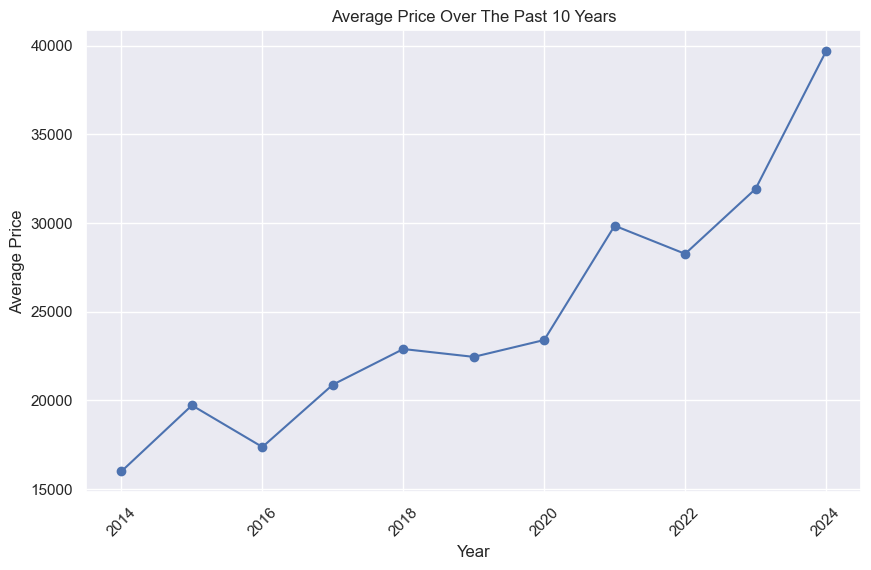

In [27]:
data_iSharesNikkei['Date'] = pd.to_datetime(data_iSharesNikkei['Date'])

data_iSharesNikkei['Year'] = data_iSharesNikkei['Date'].dt.year

average_prices = data_iSharesNikkei.groupby('Year')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(average_prices['Year'], average_prices['Price'], marker='o', linestyle='-')
plt.title('Average Price Over The Past 10 Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


With an initial investment growing significantly since 2014, the consistent upward trend suggests a promising outlook for future growth. Projecting this trend forward for the next 40 years indicates the potential for even higher growth rates. This underscores the significance of long-term investment strategies and highlights the potential for substantial returns in the future.

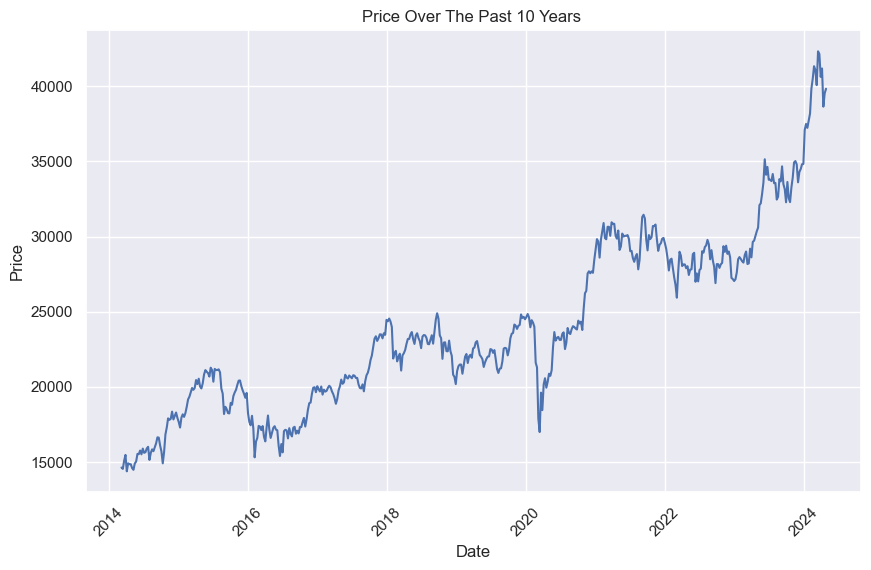

In [28]:
data_iSharesNikkei['Date'] = pd.to_datetime(data_iSharesNikkei['Date'])

data_iSharesNikkei['Year'] = data_iSharesNikkei['Date'].dt.year

average_prices = data_iSharesNikkei.groupby('Year')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(data_iSharesNikkei['Date'], data_iSharesNikkei['Price'])
plt.title('Price Over The Past 10 Years ')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Over the past 10 years, the index has growth quite significantly, which  goes with our risk tolerance, and our future investment goals. 

## Histogram of 'Price':

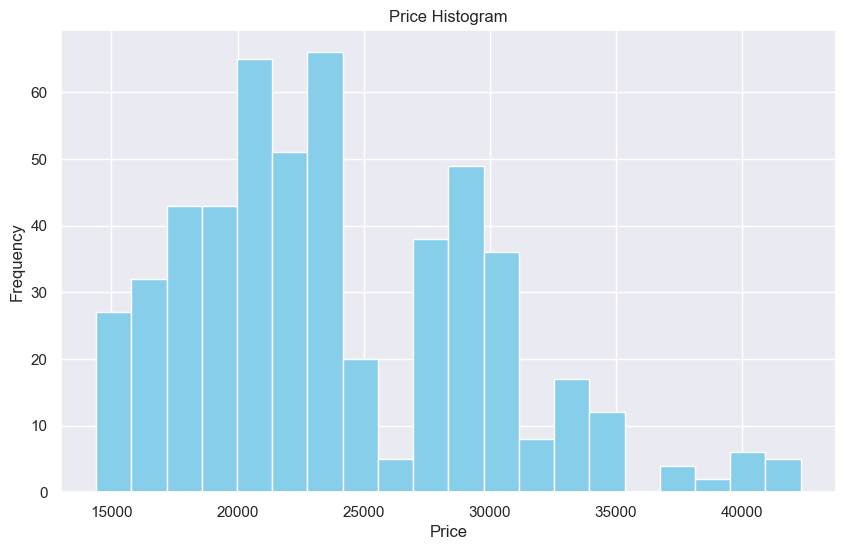

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(data_iSharesNikkei['Price'], bins=20, color='skyblue')
plt.title('Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The frequency signifies that the stock price was over 60 times at around 24000 JPY, and currently, it is between 35000 JPY and 40000 JPY, and we are purchasing our shares at 39650 JPY. 

## Box plot of 'Price':

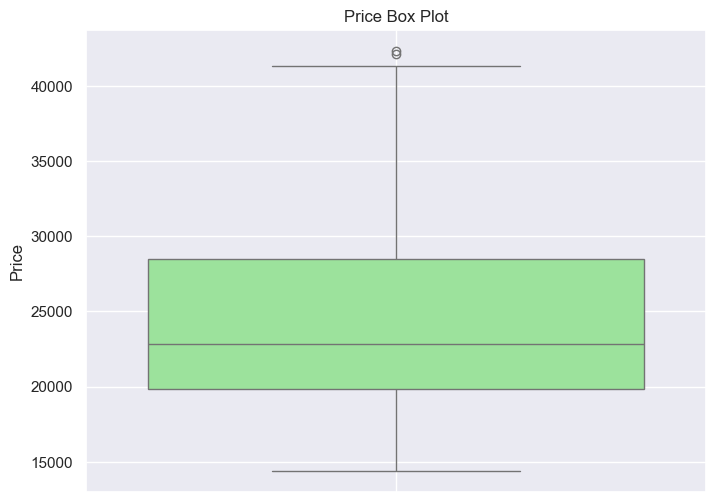

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_iSharesNikkei['Price'], orient='v', color='lightgreen')
plt.title('Price Box Plot')
plt.ylabel('Price')
plt.grid(True)
plt.show()

At some point, the stock's price was less than 15000 JPY, having an average of 23000 JPY, and the highest has been well over 40000 JPY. 

## Scatter plot of 'High' vs 'Low':

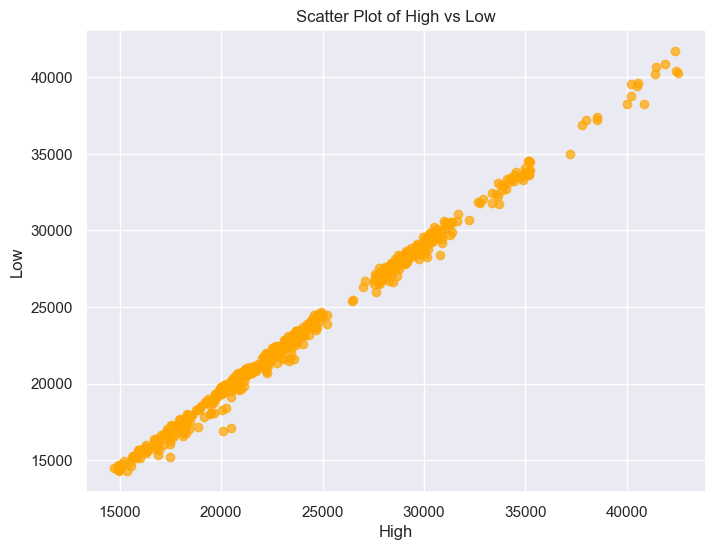

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(data_iSharesNikkei['High'], data_iSharesNikkei['Low'], color='orange', alpha=0.7)
plt.title('Scatter Plot of High vs Low')
plt.xlabel('High')
plt.ylabel('Low')
plt.grid(True)
plt.show()


## Bar plot of mean 'Price' by year: 

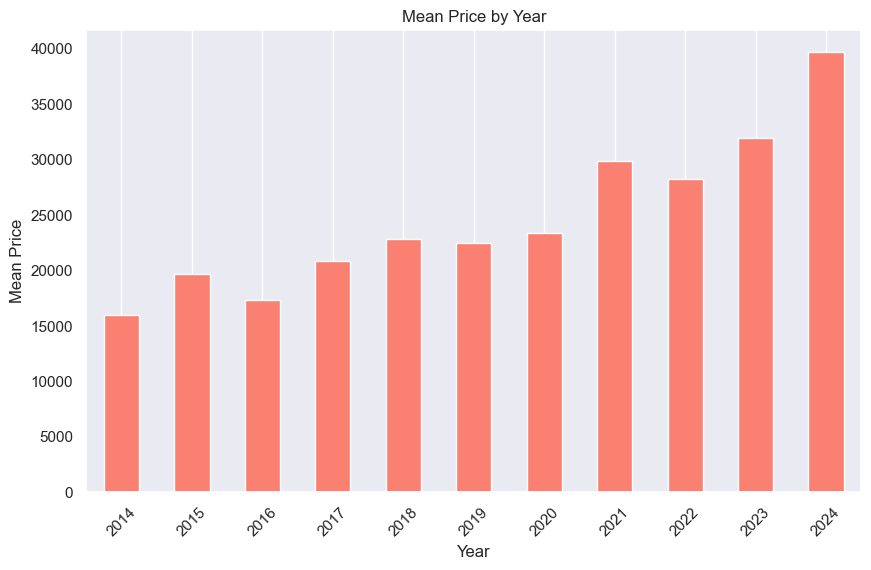

In [32]:
data_iSharesNikkei['Year'] = pd.to_datetime(data_iSharesNikkei['Date']).dt.year
mean_price_by_year = data_iSharesNikkei.groupby('Year')['Price'].mean()
plt.figure(figsize=(10, 6))
mean_price_by_year.plot(kind='bar', color='salmon')
plt.title('Mean Price by Year')
plt.xlabel('Year')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Pie chart of frequency of 'Vol.': 

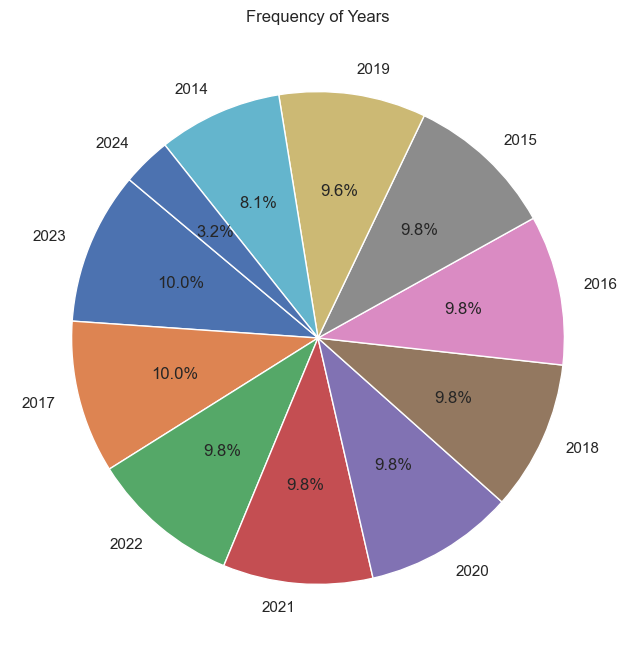

In [33]:
data_iSharesNikkei['Date'] = pd.to_datetime(data_iSharesNikkei['Date'])

data_iSharesNikkei['Year'] = data_iSharesNikkei['Date'].dt.year

year_counts = data_iSharesNikkei['Year'].value_counts()

plt.figure(figsize=(8, 8))
year_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Years')
plt.ylabel('')
plt.show()


## KDE plot of 'Price': 

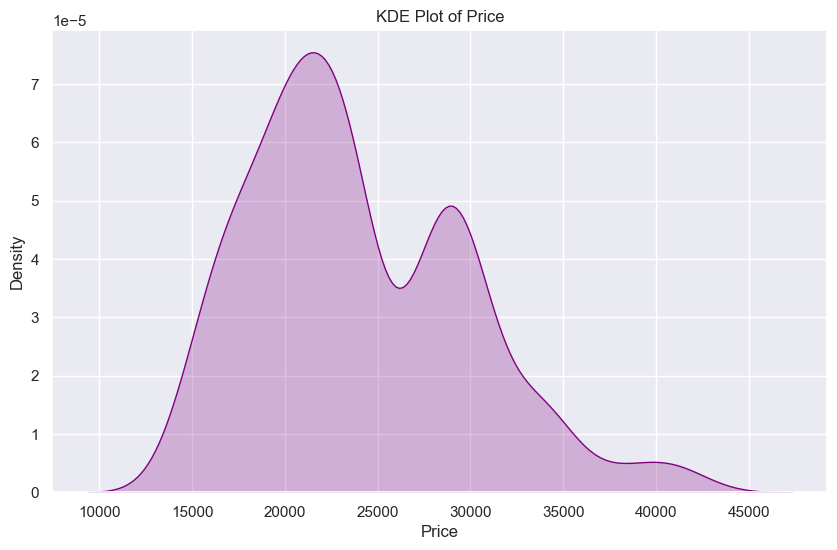

In [34]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data_iSharesNikkei['Price'], color='purple', fill=True)
plt.title('KDE Plot of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.grid(True)
plt.show()

## Heatmap of correlation matrix:

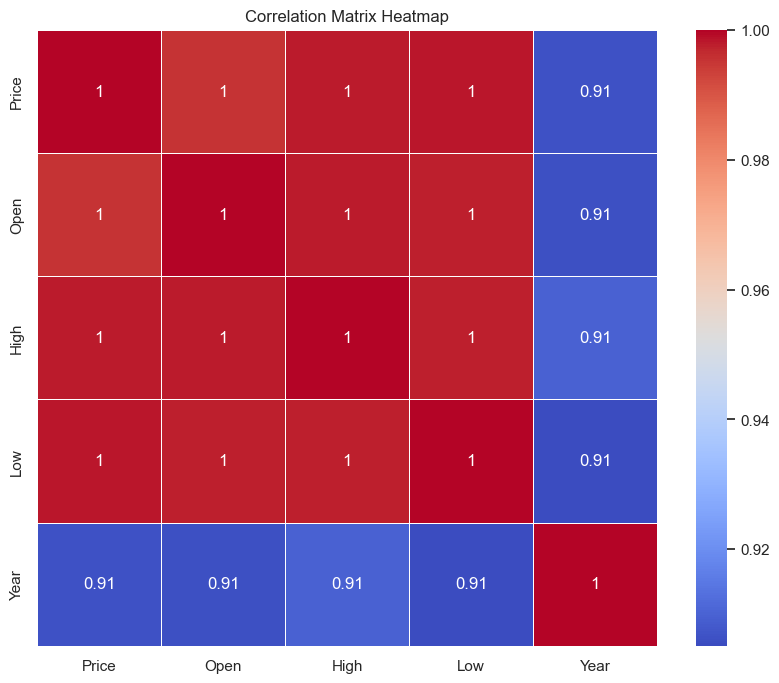

In [35]:
def convert_to_numeric(value):
    if isinstance(value, str):
        return float(value.replace(',', ''))
    return value


columns_to_convert = ['Price', 'Open', 'High', 'Low']
for col in columns_to_convert:
    data_iSharesNikkei[col] = data_iSharesNikkei[col].apply(convert_to_numeric)

numeric_data = data_iSharesNikkei.select_dtypes(include='number')

if numeric_data.isnull().values.any():
    print("Warning: DataFrame contains missing values. Please handle them before plotting the heatmap.")

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


## Pairplot of numerical columns: 

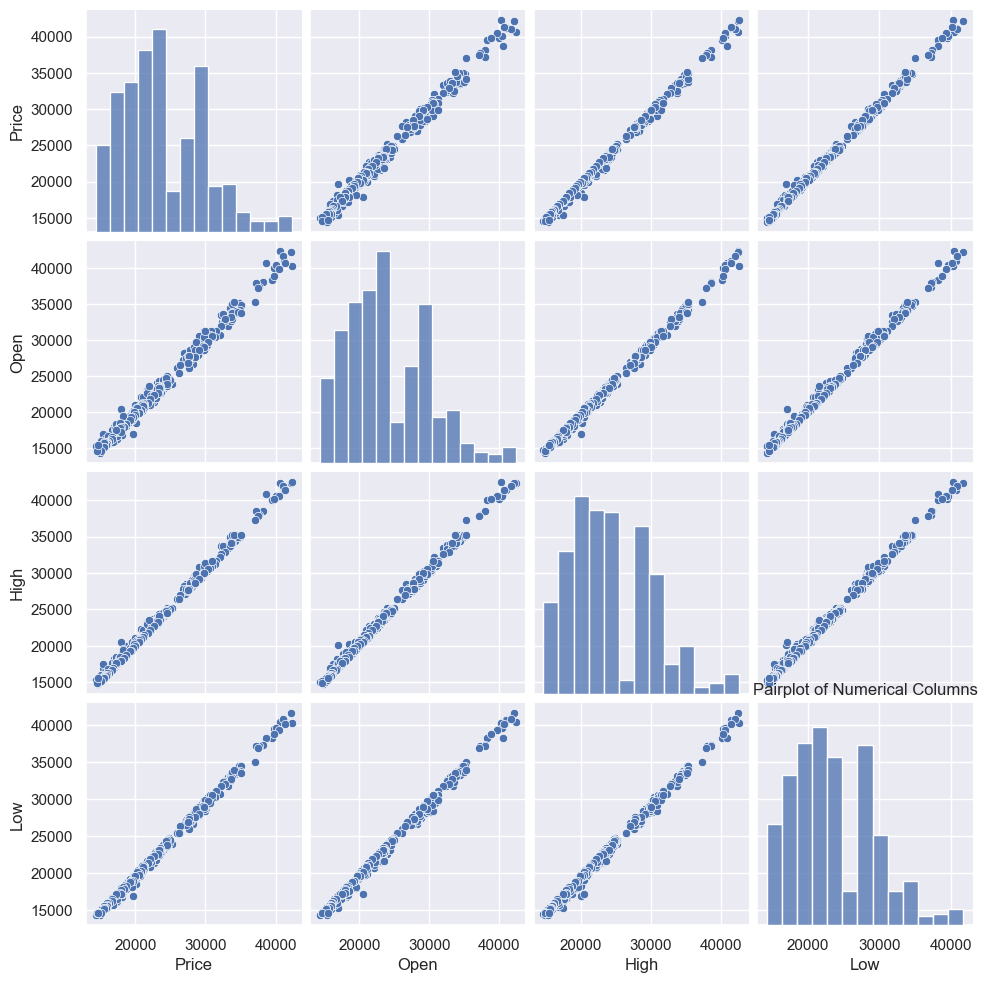

In [36]:
sns.pairplot(data_iSharesNikkei[['Price', 'Open', 'High', 'Low', 'Vol.']])
plt.title('Pairplot of Numerical Columns')
plt.show()

# Investment Prediction after 40 Years

In [37]:
def future_value_compound(principal_amount, interest_rate, investement_period):
    inflation_rate = 0.03 
    adjusted_interest_rate = interest_rate - inflation_rate
    future_value = principal_amount * (1 + adjusted_interest_rate) ** investement_period
    return future_value

principal_amount= 49700  
interest_rate = 0.045  
investement_period = 40  

future_value = future_value_compound(principal_amount, interest_rate, investement_period)
print("Future value after 40 years (considering inflation):", future_value)


Future value after 40 years (considering inflation): 90156.71491084655


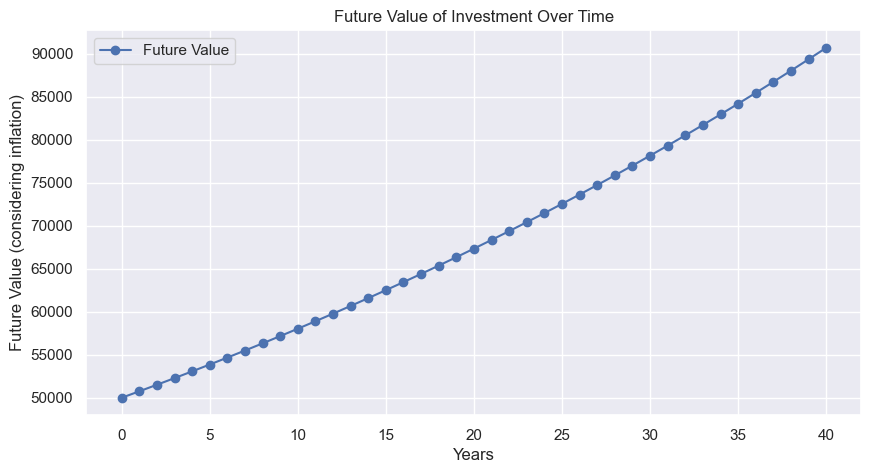

In [39]:
plt.figure(figsize=(10, 5))
plt.plot(future_values, '-o', label='Future Value')
plt.title('Future Value of Investment Over Time')
plt.xlabel('Years')
plt.ylabel('Future Value (considering inflation)')
plt.legend()
plt.grid(True)
plt.show()
